#  Author: Jiexiao He & Dolzodmaa Davaasuren

In [6]:
import pandas as pd
import numpy as np
import torch
import os, sys
import csv

# The first step is coverting the txt to csv filr. To make the statical experiment easier, we have to convert it to the csv file. We use the dataset of the 500 first and then tried the 10000.txt

In [7]:
in_filename = os.path.join('Adult/dataset_10000.txt')
out_filename = os.path.join('Adult/dataset_10000.csv')
 
df = pd.read_csv(in_filename, sep="\n")
df.to_csv(out_filename, index=False)
data = pd.read_csv("Adult/dataset_10000.csv",header = None, delim_whitespace=True)
data.to_csv("Adult/test_data.csv", index = False, header = None)

# The second step is adding the target to the original column. If the name of the column is too big, we have to read them from the txt file. But since there are only 9 columns it is okay to just add it here.

In [8]:
columns = ["eid","age","education-num","work-class","marital-status","occupation","race","sex","native-country"]
data_frame = pd.read_csv("./Adult/test_data.csv", names = columns)

# Question 1

The object means the data is string. So in this dataset the age and education number are integer, the others are string.
In this experiment I took the race, sex and age as anonymization data. Blow are the result of the question 1. In this chart you could see the most occured working class is 7, and there are 7390 people are in working set 7, there are 50% people graduate in grade 10, the male took above 67% of the total population and most of the stuff came from United-States. Yes! You could find so many information in this describe form.

In [9]:
data_frame.describe(include = "all")

,eid,age,education-num,work-class,marital-status,occupation,race,sex,native-country
count,10000,10000.000000,10000.00000,10000,10000,10000,10000,10000,10000
unique,10000,NaN,NaN,7,7,14,5,2,40
top,e3022,NaN,NaN,Private,Married-civ-spouse,Prof-specialty,White,Male,United-States
freq,1,NaN,NaN,7390,4644,1326,8597,6769,9094
mean,NaN,38.334700,10.11640,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,13.079908,2.53998,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,17.000000,1.00000,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,28.000000,9.00000,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,37.000000,10.00000,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,47.000000,13.00000,NaN,NaN,NaN,NaN,NaN,NaN


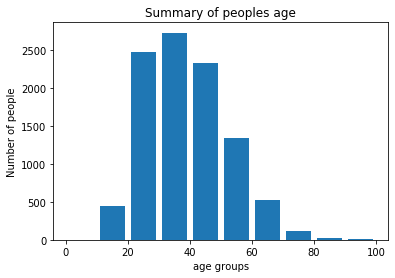

In [10]:
import matplotlib.pyplot as plt

bins=[0,10,20,30,40,50,60,70,80,90,100]
plt.hist(data_frame.age, bins, histtype='bar', rwidth=0.8)
plt.xlabel('age groups')
plt.ylabel('Number of people')
plt.title('Summary of peoples age')
plt.show()

After this we figure out one thing, the columns contain so much "-" that influence the statistic.
So we replace the "-" with ""

In [11]:
data_frame.columns=data_frame.columns.str.replace('-','')
data_frame

,eid,age,educationnum,workclass,maritalstatus,occupation,race,sex,nativecountry
0,e1,47,3,Self-emp-inc,Married-civ-spouse,Transport-moving,White,Male,Cuba
1,e2,52,16,Self-emp-not-inc,Married-civ-spouse,Prof-specialty,White,Male,United-States
2,e3,26,9,Private,Divorced,Craft-repair,White,Male,United-States
3,e4,60,9,Private,Married-civ-spouse,Craft-repair,White,Male,United-States
4,e5,21,10,Private,Never-married,Handlers-cleaners,White,Male,United-States
...,...,...,...,...,...,...,...,...,...
9995,e9996,30,9,Private,Married-civ-spouse,Transport-moving,White,Male,United-States
9996,e9997,36,10,Private,Married-civ-spouse,Sales,Black,Male,United-States
9997,e9998,70,15,Self-emp-inc,Married-civ-spouse,Prof-specialty,White,Male,United-States
9998,e9999,55,10,Private,Widowed,Farming-fishing,White,Male,United-States


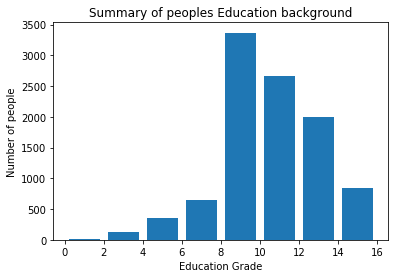

In [12]:
bins=[0,2,4,6,8,10,12,14,16]
plt.hist(data_frame.educationnum, bins, histtype='bar', rwidth=0.8)
plt.xlabel('Education Grade')
plt.ylabel('Number of people')
plt.title('Summary of peoples Education background')
plt.show()

Index(['Male', 'Female'], dtype='object')


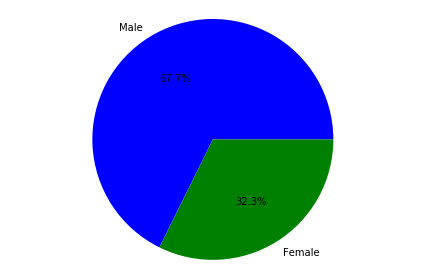

In [13]:
colors = ['b', 'g', 'r', 'c', 'm', 'y']
print(data_frame['sex'].value_counts().index)
plt.pie(data_frame['sex'].value_counts(), colors=colors,labels=data_frame['sex'].value_counts().index, autopct='%1.1f%%')
plt.axis('equal')
plt.tight_layout()
plt.show()


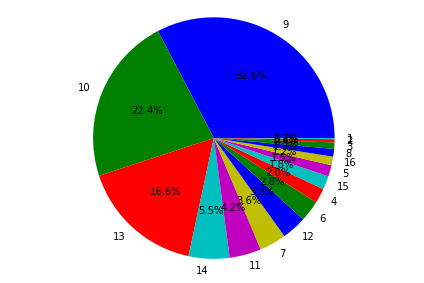

Int64Index([], dtype='int64')

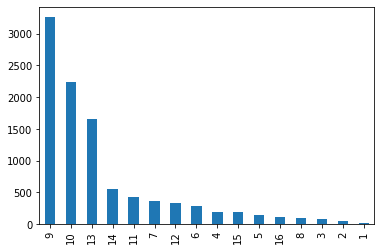

In [14]:
plt.pie(data_frame['educationnum'].value_counts(), colors=colors, labels = data_frame['educationnum'].value_counts().index, autopct='%1.1f%%')
plt.axis('equal')
plt.tight_layout()
plt.show()
data_frame['educationnum'].value_counts().plot(kind='bar')
data_frame['educationnum'].value_counts().index[data_frame['educationnum'].value_counts()<2]


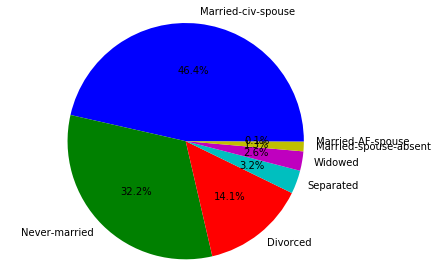

Index([], dtype='object')

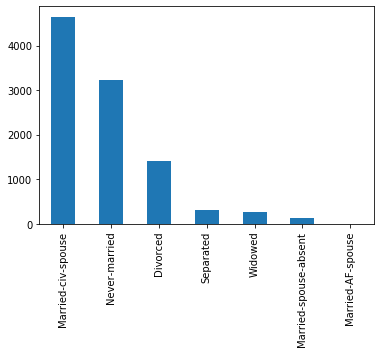

In [15]:
plt.pie(data_frame['maritalstatus'].value_counts(), colors=colors, labels = data_frame['maritalstatus'].value_counts().index, autopct='%1.1f%%')
plt.axis('equal')
plt.tight_layout()
plt.show()
data_frame['maritalstatus'].value_counts().plot(kind='bar')

data_frame['maritalstatus'].value_counts().index[data_frame['maritalstatus'].value_counts()<2]




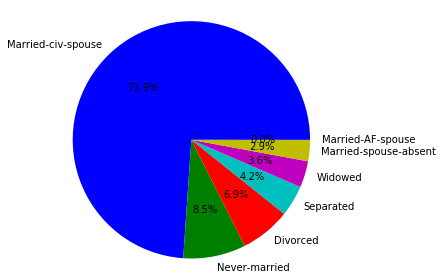

Index([], dtype='object')

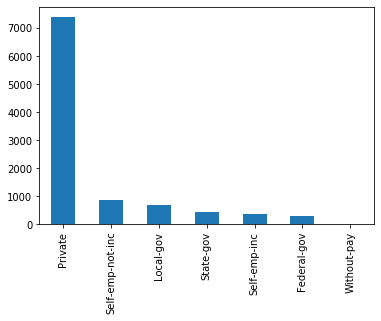

In [16]:
plt.pie(data_frame['workclass'].value_counts(), colors=colors, labels = data_frame['maritalstatus'].value_counts().index, autopct='%1.1f%%')
plt.axis('equal')
plt.tight_layout()
plt.show()
data_frame['workclass'].value_counts().plot(kind='bar')
data_frame['workclass'].value_counts().index[data_frame['workclass'].value_counts()<2]



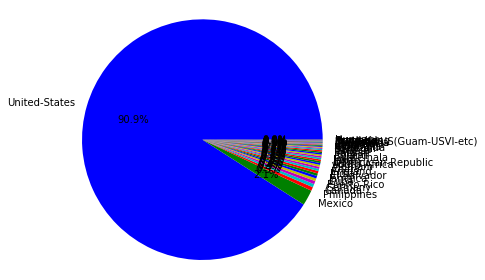

Index(['Hungary'], dtype='object')

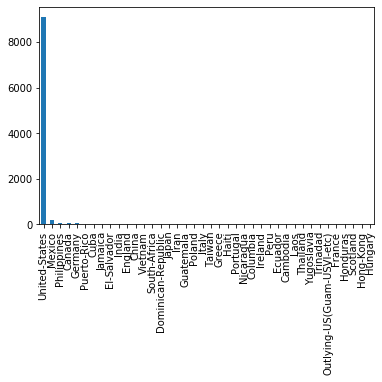

In [17]:
plt.pie(data_frame['nativecountry'].value_counts(), colors=colors, labels = data_frame['nativecountry'].value_counts().index, autopct='%1.1f%%')
plt.axis('equal')
plt.tight_layout()
plt.show()
data_frame['nativecountry'].value_counts().plot(kind='bar')
data_frame['nativecountry'].value_counts().index[data_frame['nativecountry'].value_counts()<2]

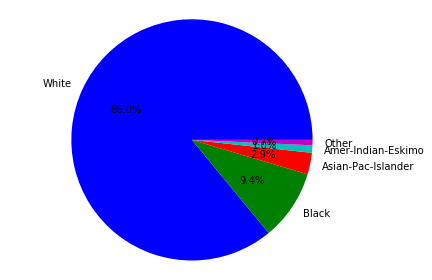

Index([], dtype='object')

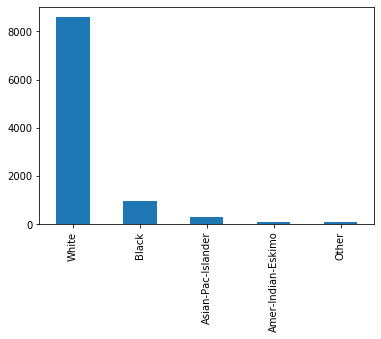

In [18]:
plt.pie(data_frame['race'].value_counts(), colors=colors, labels = data_frame['race'].value_counts().index, autopct='%1.1f%%')
plt.axis('equal')
plt.tight_layout()
plt.show()
data_frame['race'].value_counts().plot(kind='bar')
data_frame['race'].value_counts().index[data_frame['race'].value_counts()<2]

# Question 2

# Question Description: Identification of Privacy sensitive Information: Based on the data analysis you did, identify the explicit identifiers, quasi-identifiers, sensitive attributes and non-sensitive attributes in the dataset. List these attributes with your reasons for your classification. 

The  <font color=red>explicit identifiers </font> is the eid. Based on the definition from the class, the information that leads to a specific entity is the explicit identifers. Once we know the eid we will know all the information about a specific person.

The <font color=red>Quasi identifier</font> is a set of values that could be indistinctly matched to at least k respondents. The quasi-identifiers may be known by an intruder. In a quasi-identifier attribute set, the are several attributes. In order to find them, we first calculate the correlation between all features. The features with low correlation tend to form a quasi-identifier attribute set.

In [19]:
copy_df = data_frame.copy().iloc[:, 1:]
for (columnName, columnData) in copy_df.iteritems():
    if columnData.dtype != 'int64':
        labels, uniques = pd.factorize(columnData)
        copy_df[columnName] = labels
correlation = copy_df.corr()
correlation.style.background_gradient(cmap='coolwarm')

,age,educationnum,workclass,maritalstatus,occupation,race,sex,nativecountry
age,1,0.0362211,-0.0448231,-0.23057,-0.00789415,-0.0239237,-0.0707318,-0.00712265
educationnum,0.0362211,1,0.073641,-0.0939918,-0.143477,-0.0789138,-0.000933533,-0.0376859
workclass,-0.0448231,0.073641,1,0.0726341,-0.0303267,0.0887105,0.0965835,-0.0285885
maritalstatus,-0.23057,-0.0939918,0.0726341,1,0.0542057,0.107589,0.368047,0.0157997
occupation,-0.00789415,-0.143477,-0.0303267,0.0542057,1,0.0418508,0.0992172,0.0255744
race,-0.0239237,-0.0789138,0.0887105,0.107589,0.0418508,1,0.102183,0.0784093
sex,-0.0707318,-0.000933533,0.0965835,0.368047,0.0992172,0.102183,1,-0.000442999
nativecountry,-0.00712265,-0.0376859,-0.0285885,0.0157997,0.0255744,0.0784093,-0.000442999,1


We can easily see some feature have higher correlation, such as age have relatively strong correlation with workclass, marital status. We choose age, educationnum, race, occupation, workclass as the <font color=red>QI</font>, and maritalstatus as <font color=red>sensitive data</font>. For the <font color=red>non-sensetive</font> data, we choose the nativecountry, sex and workclass since there corrlation is less with the other variables.

In [20]:
feature_columns = ['age', 'educationnum', 'race', 'occupation']
numerical = ['age', 'educationnum']
sensitive_column = "maritalstatus"
data_frame = data_frame.drop(columns=['eid','sex',"workclass", "nativecountry"])

# Question 3 K-Anonymization

Refer to this code https://github.com/Nuclearstar/K-Anonymity/blob/master/k-Anonymity.ipynb, We first define a function to get the span of our partition. For each feature, it have the paticipation catergory in non-nuerical data, and in numerical data, it has a range of the dataset. 

In [21]:
# we have the dataset that contains both the numerical dataset and the non-numerical dataset
# we have to calcluate the range of the dataset.
def get_spans(df, partition, scale=None):
    spans = {}
    for feature in df.columns:
        if feature not in numerical:
            span = len(df[feature][partition].unique())
        else:
            span = df[feature][partition].max() - df[feature][partition].min()
        if scale is not None:
            span = span / scale[feature]
        spans[feature] = span
    return spans

The we define the func to split specify column, for the numerical values, we did the anonymization by replacing the data with the average. The author use the link of the variables and select the medium value of the items. 

In [22]:
# This part of the code talking about the median number of the age and the graduatation level. 
def split(df, partition, column):
    dfp = df[column][partition]
    if column in numerical:
        median = dfp.median()
        dfl = dfp.index[dfp < median]
        dfr = dfp.index[dfp >= median]
        return dfl, dfr
    else:
        values = dfp.unique()
        lv = set(values[:len(values) // 2])
        rv = set(values[len(values) // 2:])
        return dfp.index[dfp.isin(lv)], dfp.index[dfp.isin(rv)]

Judge whether a partition is ok with specified k. The similar anonymization method also could be used in selecting the k method is also used in the lecture's code. 

In [23]:
def is_k_anonymous(partition, k = 3):
    if len(partition) < k:
        return False
    return True

Define a function to partition dataset, The pop(0) tried to pop the title of the column. 

In [24]:
def partition_dataset(df, QI, sensitive_column, scale, k):
    finished_partitions = []
    partitions = [df.index]
    while partitions:
        partition = partitions.pop(0)
        spans = get_spans(df[QI], partition, scale)
        for column, span in sorted(spans.items(), key=lambda x: -x[1]):
            lp, rp = split(df, partition, column)
            if len(lp) < k or len(rp) < k:
                continue
            partitions.append(lp)
            partitions.append(rp)
            break
        else:
            finished_partitions.append(partition)
    return finished_partitions

Define a function to partion dataset. After trying this dataset we figure out its output is less than 500, so I rewrite the code here to show the anonimaztion of the dataframe.

In [25]:
#the data needed to be join if the data is sensetive and need anonymization.
#def agg_categorical_column(series):
#    return [','.join(set(series))]

#def agg_numerical_column(series):
#    return [series.mean()]

#def build_dataset(df, partitions, feature_columns, sensitive_column):
#    aggregations = {}
#    for column in feature_columns:
#        if column not in numerical:
#            aggregations[column] = agg_categorical_column
#        else:
#            aggregations[column] = agg_numerical_column
#    rows = []
#    for i, partition in enumerate(partitions):
#        partition = df.loc[partition]
#        grouped_columns = partition.agg(aggregations, squeeze=False)
#        sensitive_counts = partition.groupby(sensitive_column).agg({sensitive_column: 'count'})
#        values = grouped_columns.iloc[0].to_dict()
#        for sensitive_value, count in sensitive_counts[sensitive_column].items():
#            if count == 0:
#                continue
#            values.update({
#                sensitive_column: sensitive_value,
#            })
#            rows.append(values.copy())
#    return pd.DataFrame(rows)

#for column in data_frame.columns:
#    if column not in numerical:
#        data_frame[column] = data_frame[column].astype('category')

#full_spans = get_spans(data_frame, data_frame.index)
#finished_partitions = partition_dataset(data_frame, feature_columns, sensitive_column, full_spans, 3)
#dfn = build_dataset(data_frame, finished_partitions, feature_columns, sensitive_column)
#dfn

In [26]:
def agg_categorical_column(series):
    return [','.join(set(series))]


def agg_numerical_column(series):
    return [series.mean()]


def build_dataset(df, partitions, feature_columns, sensitive_column):
    aggregations = {}
    ret = pd.DataFrame(None, index=np.arange(df.shape[0]), columns=df.columns)
    for column in feature_columns:
        if column in numerical:
            aggregations[column] = agg_numerical_column
        else:
            aggregations[column] = agg_categorical_column
    rows = []
    for i, partition in enumerate(partitions):
        grouped_columns = df.loc[partition].agg(aggregations, squeeze=False)
        for j in partition:
            for column in grouped_columns.columns:
                ret[column][j] = grouped_columns[column][0]
            ret[sensitive_column][j] = df [sensitive_column][j]
    return ret
 
for column in data_frame.columns:
    if column not in numerical:
        data_frame[column] = data_frame[column].astype('category')

full_spans = get_spans(data_frame, data_frame.index)
finished_partitions = partition_dataset(data_frame, feature_columns, sensitive_column, full_spans, 3)
dfn = build_dataset(data_frame, finished_partitions, feature_columns, sensitive_column)
dfn

,age,educationnum,maritalstatus,occupation,race
0,43.3333,3,Married-civ-spouse,Transport-moving,White
1,52.4,16,Married-civ-spouse,Prof-specialty,White
2,26,9,Divorced,Craft-repair,White
3,60,9,Married-civ-spouse,Craft-repair,White
4,20.4706,10.2941,Never-married,Handlers-cleaners,White
...,...,...,...,...,...
9995,30,9,Married-civ-spouse,Transport-moving,White
9996,35.3333,10,Married-civ-spouse,Sales,Black
9997,69,15,Married-civ-spouse,Prof-specialty,White
9998,54.5,10,Widowed,Farming-fishing,White


#  We could see except for the marriage status, the Qi have been changed using the combination of the occupation and the race.  

# Question 4 Analysis: Explain how your solution impacts the utility of the dataset. Does it retain the original data distribution. Provide at least two queries as test examples to show the differences in utility before and after the anonymization.

In [27]:
data_frame['age'] = data_frame['age'].astype('float')
dfn['age'] = dfn['age'].astype('float')
print(data_frame.age.describe())
print(dfn.age.describe())

count    10000.000000
mean        38.334700
std         13.079908
min         17.000000
25%         28.000000
50%         37.000000
75%         47.000000
max         90.000000
Name: age, dtype: float64
count    10000.000000
mean        38.334700
std         13.018287
min         17.000000
25%         28.000000
50%         37.000000
75%         47.000000
max         90.000000
Name: age, dtype: float64


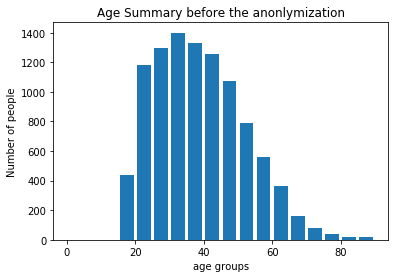

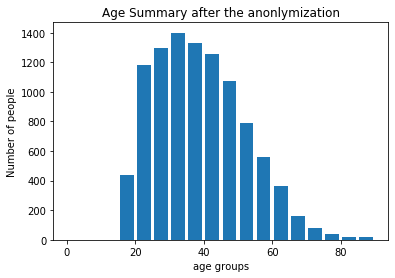

In [28]:
bins=[0,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90]
plt.hist(data_frame.age, bins, histtype='bar', rwidth=0.8)
plt.xlabel('age groups')
plt.ylabel('Number of people')
plt.title('Age Summary before the anonlymization')
plt.show()



bins=[0,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90]
plt.hist(data_frame.age, bins, histtype='bar', rwidth=0.8)
plt.xlabel('age groups')
plt.ylabel('Number of people')
plt.title('Age Summary after the anonlymization')
plt.show()

In [29]:
data_frame['educationnum'] = data_frame['educationnum'].astype('float')
dfn['educationnum'] = dfn['educationnum'].astype('float')
print(data_frame.educationnum.describe())
print(dfn.educationnum.describe())

count    10000.00000
mean        10.11640
std          2.53998
min          1.00000
25%          9.00000
50%         10.00000
75%         13.00000
max         16.00000
Name: educationnum, dtype: float64
count    10000.000000
mean        10.116400
std          2.491534
min          1.000000
25%          9.000000
50%         10.000000
75%         12.000000
max         16.000000
Name: educationnum, dtype: float64


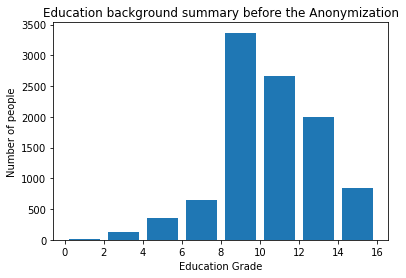

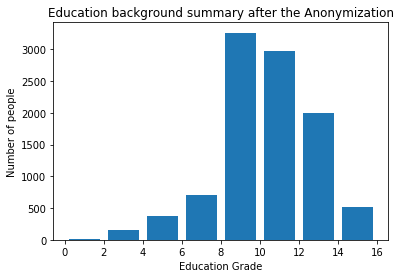

In [30]:
bins=[0,2,4,6,8,10,12,14,16]
plt.hist(data_frame.educationnum, bins, histtype='bar', rwidth=0.8)
plt.xlabel('Education Grade')
plt.ylabel('Number of people')
plt.title('Education background summary before the Anonymization')
plt.show()
bins=[0,2,4,6,8,10,12,14,16]
plt.hist(dfn.educationnum, bins, histtype='bar', rwidth=0.8)
plt.xlabel('Education Grade')
plt.ylabel('Number of people')
plt.title('Education background summary after the Anonymization')
plt.show()


# After the annoymization, the age columns are more smooth, the queries shows the numerial data still shows the original distribution. So the anonymizatio is successful. 